# Fluctuations (Multiscale)

This notebook covers fluctuation methods that are multiscale / multifractal.

The notebook includes:
- multiscale / multifractal detrended fluctuation analysis

In [1]:
# Setup notebook state
from nbutils import setup_notebook; setup_notebook()

In [2]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from neurokit2.complexity import complexity_mfdfa

In [3]:
# Import custom project code
from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import multi_dfa
from apm.methods.settings import MDFA_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import COLORS
from apm.plts.utils import figsaver
from apm.sim.examples import get_examples, check_examples
from apm.sim.settings import N_SIMS2 as N_SIMS
from apm.sim.defs import SIM_ITERS

## Settings

In [4]:
# Get current sampling rate
fs = SIM_ITERS.fs

In [5]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '22b_multiscale_fluctuations'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [6]:
# # Settings for loading simulations
# SIMPATH = APMDB().sims_path / 'time_series'

In [7]:
# # Define structure for precomputed simulation file name
# sim_file = 'ts_sims_{}_' + str(SIM_ITERS.fs)

In [8]:
# Set the random seed
set_random_seed(111)

In [9]:
# Define collection of example signals
examples = get_examples()

## Multiscale / multifractal DFA

Multifractal DFA is an extension of DFA.

In [10]:
# Check multiscale DFA measure parameters
print(MDFA_PARAMS)

{}


### Example Application

Multifractal DFA includes a large number of outcome measures that can be derived from estimate.

To exaplore that, we can explore the implementation of multiscale DFA from `neurokit2`.

In [11]:
# Compute multiscale DFA, return all outputs
mdfa_res, mdfa_info = complexity_mfdfa(examples['powerlaw'])

In [12]:
# Check the multiscale DFA results
mdfa_res

,Width,Peak,Mean,Max,Delta,Asymmetry,Fluctuation,Increment
0,0.31585,0.815426,0.820887,0.708118,-0.023066,-0.482708,0.000015,0.004868


In [13]:
# Check the returned multiscale DFA info
list(mdfa_info.keys())

['scale',
 'q',
 'Fluctuations',
 'Alpha',
 'h',
 'Tau',
 'H',
 'D',
 'Width',
 'Peak',
 'Mean',
 'Max',
 'Delta',
 'Asymmetry',
 'Fluctuation',
 'Increment']

### Calculate Multiscale / Multifractal DFA on Example Signals

In [14]:
# Check the multiscale DFA measures across some example signals
check_examples(examples, multi_dfa, MDFA_PARAMS, 'multifractal dfa')

Computed multifractal dfa:
  powerlaw       : 	 0.3159
  synaptic       : 	 0.2091
  knee           : 	 0.2237
  oscillation    : 	 0.0709
  burst          : 	 1.0631
  combined       : 	 0.2081
  comb_burst     : 	 0.3697
  comb_peak      : 	 0.4055


### Multiscale DFA: Aperiodic Variations

In [15]:
# Run simulations calculating multiscale DFA across exponents
mdfa_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], multi_dfa, MDFA_PARAMS, N_SIMS)

In [16]:
# Run simulations calculating multiscale DFA across exponents with an oscillation
mdfa_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], multi_dfa, MDFA_PARAMS, N_SIMS)

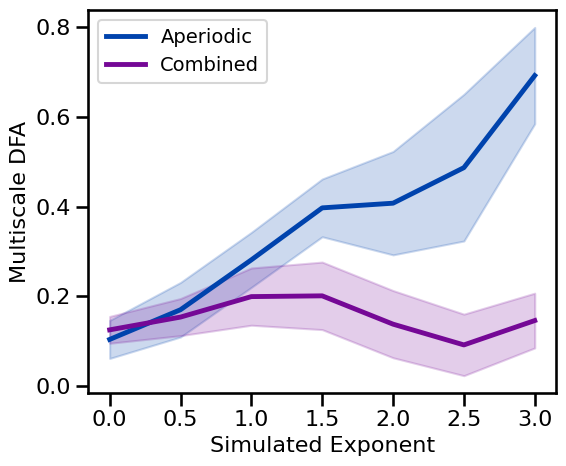

In [17]:
# Plot multiscale DFA estimates across aperiodic variations
plot_ap_sims(mdfa_sims_exp, mdfa_sims_comb, 'Multiscale DFA', **fsaver('mdfa_ap'))

### Multiscale DFA: Periodic Measures

In [18]:
# Run simulations calculating multiscale DFA across oscillation frequency
mdfa_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], multi_dfa, MDFA_PARAMS, N_SIMS)

In [19]:
# Run simulations calculating multiscale DFA across oscillation power
mdfa_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], multi_dfa, MDFA_PARAMS, N_SIMS)

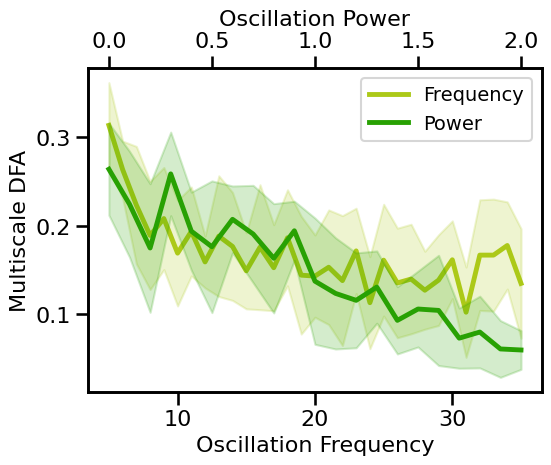

In [20]:
# Plot multiscale DFA estimates across periodic variations
plot_pe_sims(mdfa_sims_freq, mdfa_sims_pow, 'Multiscale DFA', **fsaver('mdfa_pe'))

### Multiscale DFA: Knee Variations

In [21]:
# Run simulations calculating multiscale DFA across timescales
mdfa_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                             multi_dfa, MDFA_PARAMS, N_SIMS)

In [22]:
# Run simulations calculating multiscale DFA across peak bandwidths (sims from file)
#mdfa_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'),
#                               multi_dfa, MDFA_PARAMS, N_SIMS)

mdfa_sims_knee = run_sims_load('ap-knee-' + str(fs), multi_dfa, MDFA_PARAMS, N_SIMS)

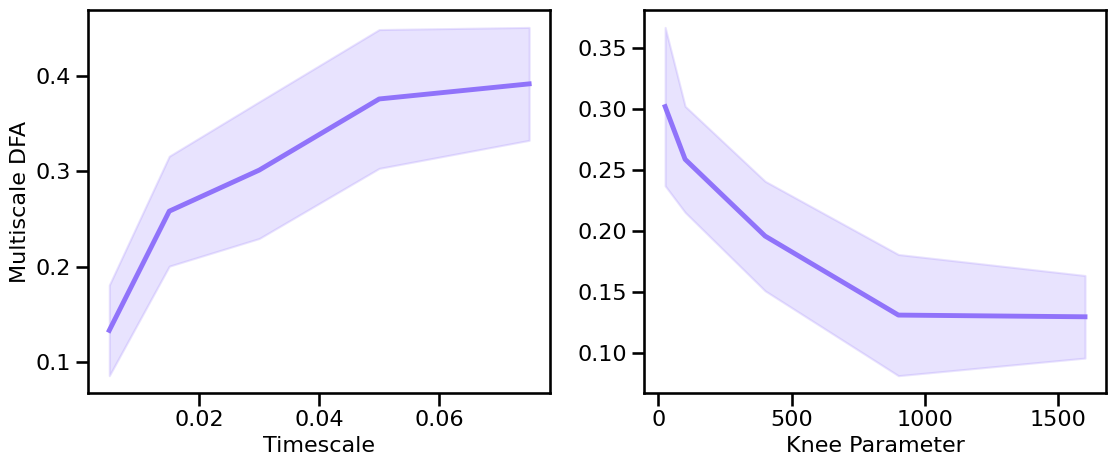

In [23]:
# Plot the estimated multiscale DFA across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, mdfa_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, mdfa_sims_knee, 'Knee Parameter',
              ylabel='Multiscale DFA', color=COLORS['KN'], **fsaver('mdfa_kn_vars'))

### Multiscale DFA: Peak Variations

In [24]:
# Run simulations calculating multiscale DFA across peak bandwidths (sims from file)
#mdfa_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'),
#                             multi_dfa, MDFA_PARAMS, N_SIMS)

mdfa_sims_bw = run_sims_load('comb-bw-' + str(fs), multi_dfa, MDFA_PARAMS, N_SIMS)

In [25]:
# Run simulations calculating multiscale DFA across burst probabilities
mdfa_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'],
                           multi_dfa, MDFA_PARAMS, N_SIMS)

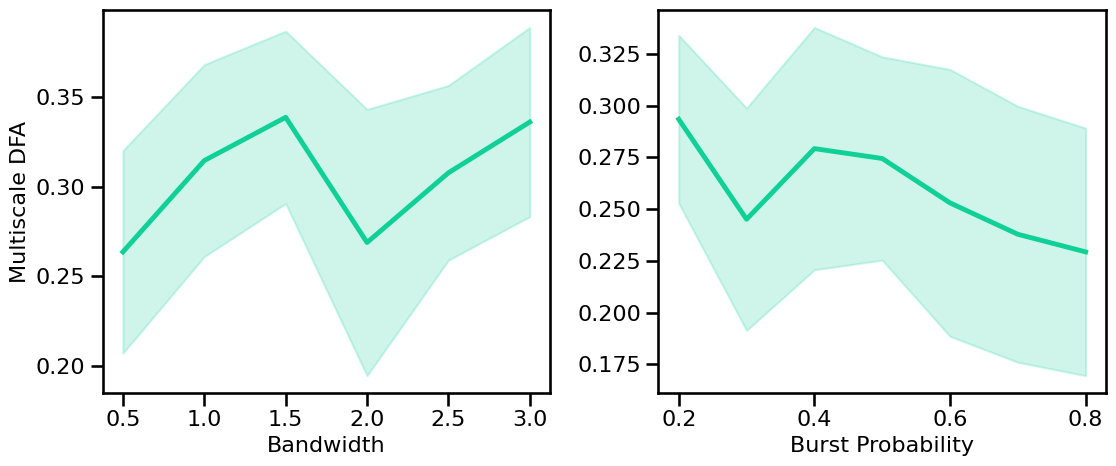

In [26]:
# Plot the estimated multiscale DFA across peak variations
plot_sims_two(SIM_ITERS['peak_bw'].values, mdfa_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, mdfa_sims_burst, 'Burst Probability',
              ylabel='Multiscale DFA', color=COLORS['BW'], **fsaver('mdfa_pe_vars'))

## Conclusions

Multiscale / multifractal DFA:
- Multiscale DFA measures increase across aperiodic exponent (in powerlaw signals, but not in combined signals)
- Multiscale DFA slightly decreases across increasing oscillation frequency and power